In [43]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
sns.set_theme()
# %matplotlib widget
# params = {
#     'font.size': 18,
#     'axes.labelsize': 18,
#     'axes.titlesize': 18,
#     'legend.fontsize': 18,
#     'xtick.labelsize': 18,
#     'ytick.labelsize': 18,
#     'axes.facecolor': 'white',
#     'savefig.facecolor': 'white',}

# matplotlib.rcParams.update(params)

In [44]:
picks = pd.read_csv("mammoth.csv", parse_dates=["phase_time"])
gamma_picks = pd.read_csv("picks_phasenet_filtered/mammoth.csv", parse_dates=["phase_time"])
gamma_catalog = pd.read_csv("gamma_catalog.csv", parse_dates=["time"])

In [45]:
standard_catalog = pd.read_csv("standard_catalog.csv", parse_dates=["time"])
standard_catalog["depth_km"] = standard_catalog["depth(m)"] / 1e3
standard_catalog = standard_catalog[(standard_catalog["time"] > gamma_catalog["time"].min()) & (standard_catalog["time"] < gamma_catalog["time"].max())]

In [46]:
hypoDD_ct_catalog = pd.read_csv(
    "hypoDD_ct_catalog.txt",
    sep="\s+",
    names=[
        "ID",
        "LAT",
        "LON",
        "DEPTH",
        "X",
        "Y",
        "Z",
        "EX",
        "EY",
        "EZ",
        "YR",
        "MO",
        "DY",
        "HR",
        "MI",
        "SC",
        "MAG",
        "NCCP",
        "NCCS",
        "NCTP",
        "NCTS",
        "RCC",
        "RCT",
        "CID",
    ],
)
hypoDD_ct_catalog["time"] = hypoDD_ct_catalog.apply(
    lambda x: f'{x["YR"]:04.0f}-{x["MO"]:02.0f}-{x["DY"]:02.0f}T{x["HR"]:02.0f}:{x["MI"]:02.0f}:{min(x["SC"], 59.999):05.3f}',
    axis=1,
)
hypoDD_ct_catalog["time"] = hypoDD_ct_catalog["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f"))
hypoDD_ct_catalog["depth_km"] = hypoDD_ct_catalog["DEPTH"]
hypoDD_ct_catalog["longitude"] = hypoDD_ct_catalog["LON"]
hypoDD_ct_catalog["latitude"] = hypoDD_ct_catalog["LAT"]

hypoDD_ct_catalog = hypoDD_ct_catalog[(hypoDD_ct_catalog["time"] > gamma_catalog["time"].min()) & (hypoDD_ct_catalog["time"] < gamma_catalog["time"].max())]

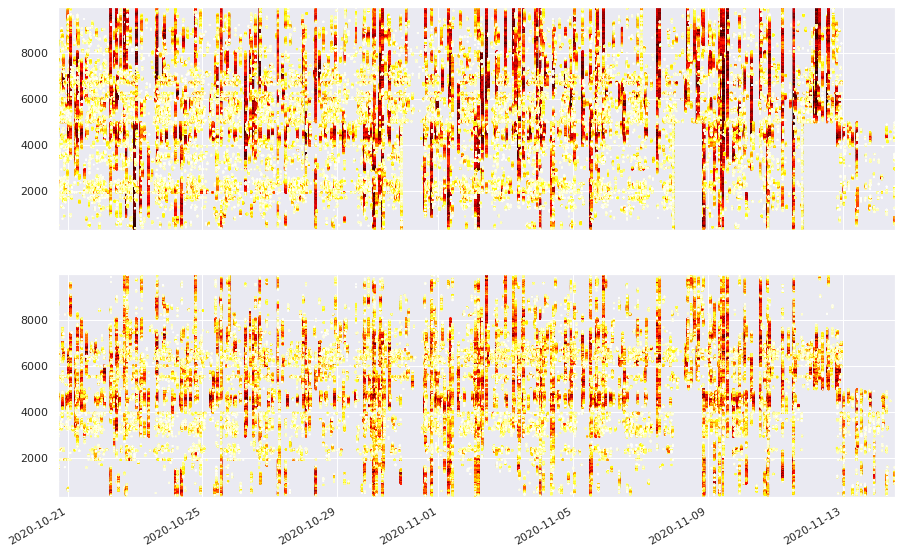

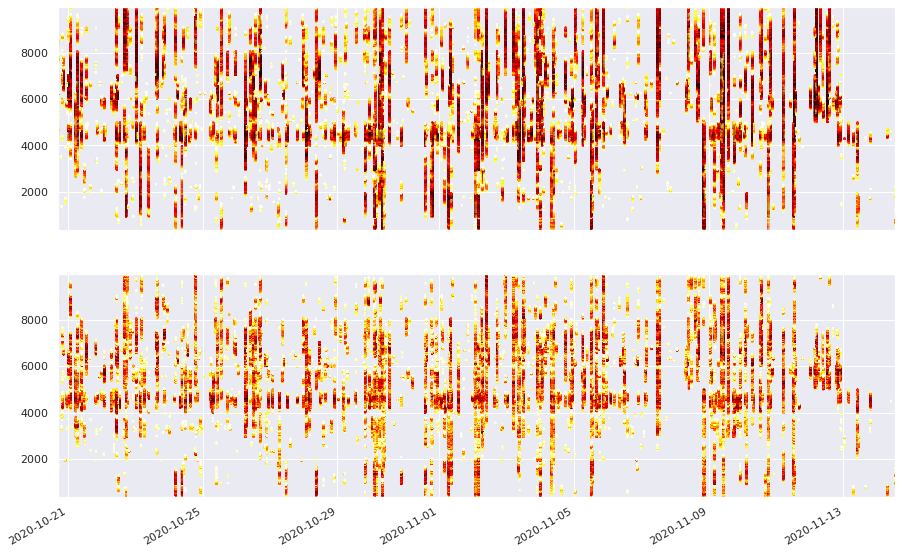

In [53]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True, sharey=True)

axes[0].scatter(picks[picks["phase_type"] == "P"]["phase_time"], picks[picks["phase_type"] == "P"]["channel_index"], c=picks[picks["phase_type"] == "P"]["phase_score"], s=1, cmap="hot_r", vmin=0.6, vmax=1.0, rasterized=True)
axes[0].autoscale(tight=True)

axes[1].scatter(picks[picks["phase_type"] == "S"]["phase_time"], picks[picks["phase_type"] == "S"]["channel_index"], c=picks[picks["phase_type"] == "S"]["phase_score"], s=1, cmap="hot_r", vmin=0.6, vmax=1.0, rasterized=True)
axes[1].autoscale(tight=True)

fig.autofmt_xdate()
fig.savefig("figures/raw_picks.png", bbox_inches='tight', dpi=300)
fig.savefig("figures/raw_picks.pdf", bbox_inches='tight', dpi=300)

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True, sharey=True)

axes[0].scatter(gamma_picks[gamma_picks["phase_type"] == "P"]["phase_time"], gamma_picks[gamma_picks["phase_type"] == "P"]["channel_index"], c=gamma_picks[gamma_picks["phase_type"] == "P"]["phase_score"], s=1, cmap="hot_r", vmin=0.6, vmax=1.0, rasterized=True)
axes[0].autoscale(tight=True)

axes[1].scatter(gamma_picks[gamma_picks["phase_type"] == "S"]["phase_time"], gamma_picks[gamma_picks["phase_type"] == "S"]["channel_index"], c=gamma_picks[gamma_picks["phase_type"] == "S"]["phase_score"], s=1, cmap="hot_r", vmin=0.6, vmax=1.0, rasterized=True)
axes[1].autoscale(tight=True)

fig.autofmt_xdate()
fig.savefig("figures/gamma_picks.png", bbox_inches='tight', dpi=300)
fig.savefig("figures/gamma_picks.pdf", bbox_inches='tight', dpi=300)

In [49]:
def plot_location(catalog, color=None, fname="catalog", xlim=None, ylim=None, zlim=None):
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [3, 1]})

    if color is None:
        color = "k"
    axes[0,0].scatter(catalog["longitude"], catalog["latitude"], s=10, c=color, cmap="viridis", rasterized=True)
    axes[0,0].set_title(f"Event Number: {len(catalog)}")
    axes[0,0].autoscale(tight=True)
    if xlim is None:
        xlim = axes[0,0].get_xlim()
    else:
        axes[0,0].set_xlim(xlim)
    if ylim is None:
        ylim = axes[0,0].get_ylim()
    else:
        axes[0,0].set_ylim(ylim)

    axes[0,1].scatter(catalog["depth_km"], catalog["latitude"],  s=10, c=color, cmap="viridis", rasterized=True)
    axes[0,1].autoscale(tight=True)
    if ylim is not None:
        axes[0,1].set_ylim(ylim)
    if zlim is not None:
        axes[0,1].set_xlim(zlim)

    im = axes[1,0].scatter(catalog["longitude"], catalog["depth_km"], s=10, c=color, cmap="viridis", rasterized=True)
    axes[1,0].autoscale(tight=True)    
    if xlim is not None:
        axes[1,0].set_xlim(xlim)
    if zlim is None:
        zlim = axes[1,0].get_ylim()
    else:
        axes[1,0].set_ylim(zlim)
    axes[1,0].invert_yaxis()

    # fig.colorbar(im, ax=axes[1,1], location="right", anchor=(-1, -1))
    axes[1, 1].axis('off')
    fig.tight_layout()

    fig.savefig(fname + ".pdf", bbox_inches='tight', dpi=300)
    fig.savefig(fname + ".png", bbox_inches='tight', dpi=300)

    return xlim, ylim, zlim

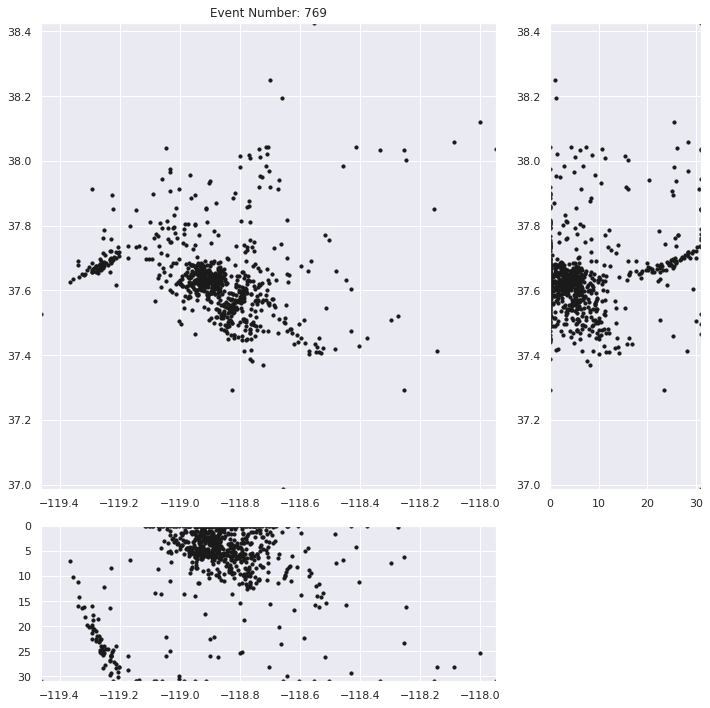

In [50]:
xlim, ylim, zlim = plot_location(gamma_catalog, color="k", fname="figures/gamma_catalog_das")

((-119.461854, -117.94593), (36.985971, 38.426975), (0.0, 31.0))

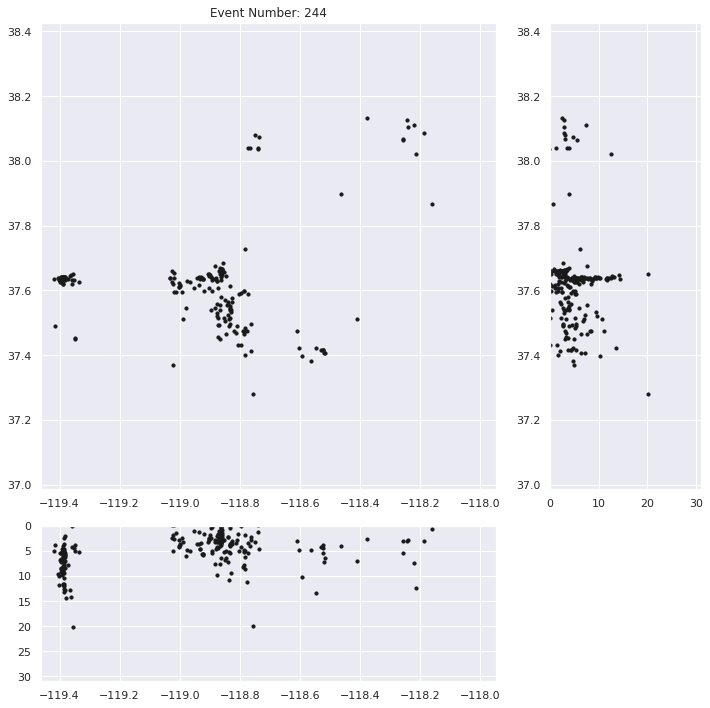

In [51]:
plot_location(standard_catalog, color="k", fname="figures/standard_catalog", xlim=xlim, ylim=ylim, zlim=zlim)

((-119.461854, -117.94593), (36.985971, 38.426975), (0.0, 31.0))

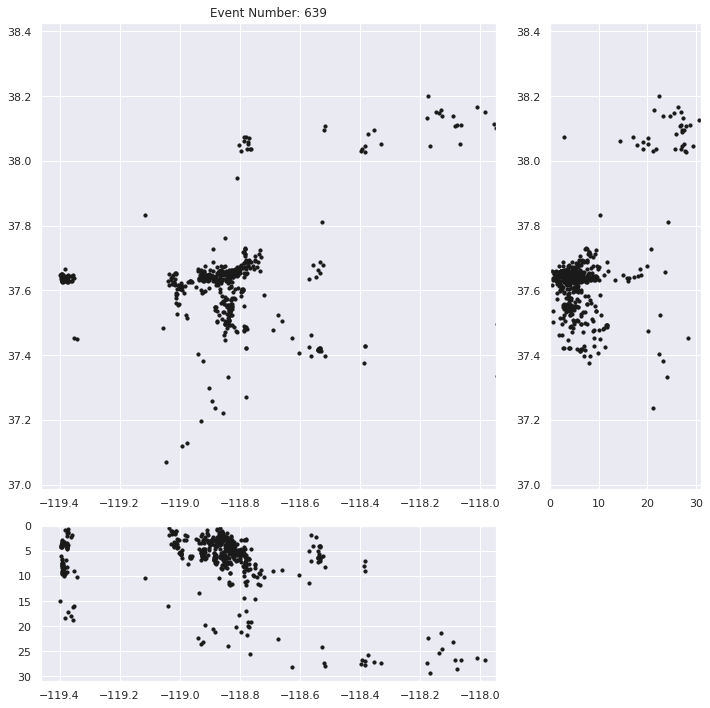

In [54]:
plot_location(hypoDD_ct_catalog, color="k", fname="figures/hypodd_catalog", xlim=xlim, ylim=ylim, zlim=zlim)